# Finance Domain - Win Prediction

# Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import time
import warnings
warnings.filterwarnings ('ignore')
import os
import tensorflow as tf
from tensorflow import keras

from sklearn import preprocessing
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from yellowbrick.classifier import ROCAUC, roc_auc
from yellowbrick.features import RadViz
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Import the Dataset
mydata = pd.read_excel('Win_Prediction_Data.xlsx')
mydata.head(10)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
5,Internal,Solution 32,2011-05-24,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
6,Internal,Solution 59,2011-11-03,Sector 2,L10,Mervin Harwood,rahul sharma,526176.47,Won
7,Govt,Solution 7,2012-09-17,Sector 13,L5,Sargar Deep Rao,Vidur Hukle,409705.88,Lost
8,Consumer Good,Solution 42,2012-04-11,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94,Won
9,Internal,Solution 59,2011-11-17,Sector 20,Others,Sargar Deep Rao,Hardeep Suksma,558823.53,Lost


In [3]:
# Create a copy of the original dataset
newdata = mydata.copy()

# Handling Missing Values

In [4]:
# Missing Data Check
(newdata.isnull().sum() / len(newdata)) * 100
# 'Client Category' has 0.78% Missing Values

Client Category     0.78521
Solution Type       0.00000
Deal Date           0.00000
Sector              0.00000
Location            0.00000
VP Name             0.00000
Manager Name        0.00000
Deal Cost           0.00000
Deal Status Code    0.00000
dtype: float64

In [5]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


<AxesSubplot:>

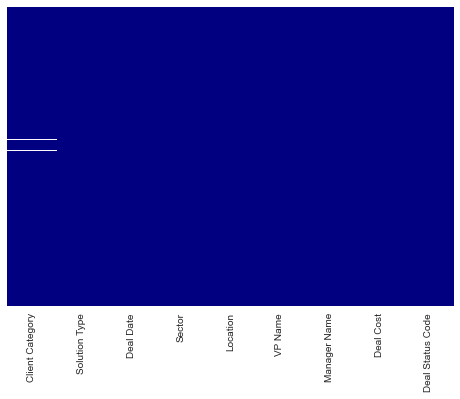

In [6]:
# Visualize the magnitude of Missing Values
sns.heatmap(newdata.isnull(), yticklabels = False, cbar = False, cmap = 'gist_ncar')

In [7]:
# Count of each category in column 'client_category'
client_category = newdata['Client Category'].value_counts()
client_category

Others                   1763
Internal                 1454
Services_based           1202
Tech                      913
Domestic Public Bank      419
International Bank        376
Consulting                352
Finance                   339
Telecom                   327
Power ind                 264
Domestic Private Bank     262
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            152
Domestic Bank             134
Retail_market             126
Govt                      121
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce                 32
Airpline  

<AxesSubplot:>

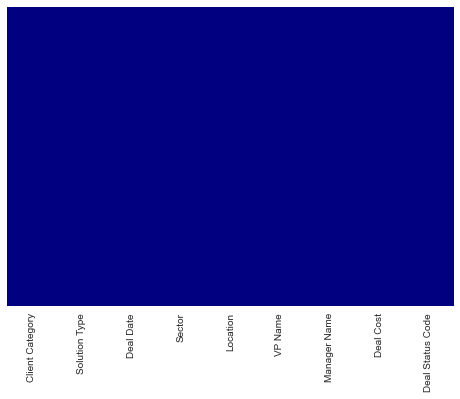

In [8]:
# Fill missing values with 'Others' as thats the most frequently appearing category
newdata['Client Category'] = newdata['Client Category'].fillna('Others')
sns.heatmap(newdata.isnull(), yticklabels = False, cbar = False, cmap = 'gist_ncar')
# All missing values are treated

In [9]:
# Verify the effect of Missing Value Treatment
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   10061 non-null  object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [10]:
# Describe the object data types

sumcat = newdata.describe(include = 'O')
sumcat

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Status Code
count,10061,10061,10061,10061,10061,10061,10061
unique,41,67,25,13,43,278,2
top,Others,Solution 32,Sector 23,L10,Mervin Harwood,Molly Eakes,Lost
freq,1842,1439,2693,3360,1166,323,6306


In [11]:
# Check for Imbalance Dataset
newdata['Deal Status Code'].value_counts()

# If Minority Category * 2 > Majority, it's not a Minority class. 
# We do not have any minority class in this dataset as the above condition is not fulfilled

Lost    6306
Won     3755
Name: Deal Status Code, dtype: int64

# Client Category

In [12]:
# Unique categories in the column 'Client Category'
client_category_index = newdata['Client Category'].value_counts().index
client_category_index

Index(['Others', 'Internal', 'Services_based', 'Tech', 'Domestic Public Bank',
       'International Bank', 'Consulting', 'Finance', 'Telecom', 'Power ind',
       'Domestic Private Bank', 'Insurance', 'Consumer Good', 'Automobiles',
       'Infrastructure', 'Domestic Bank', 'Retail_market', 'Govt',
       'Hospitality', 'Manufacturing', 'Pharma', 'Healthcare', 'Electronics',
       'Media_Journal', 'Industries', 'Research Development', 'Energy',
       'Knowledge', 'Management', 'Govt Bank Special', 'Payment', 'Energy ',
       'e-commerce', 'Airpline', 'Holding', 'International Org', 'Logistics',
       'Real Estate', 'Share_market', 'Tax_audit', 'Medical '],
      dtype='object')

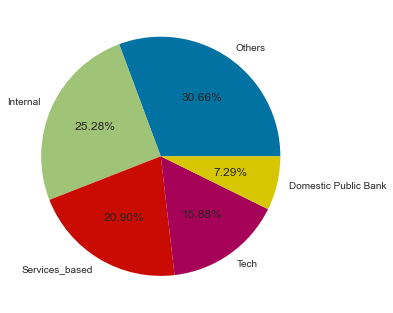

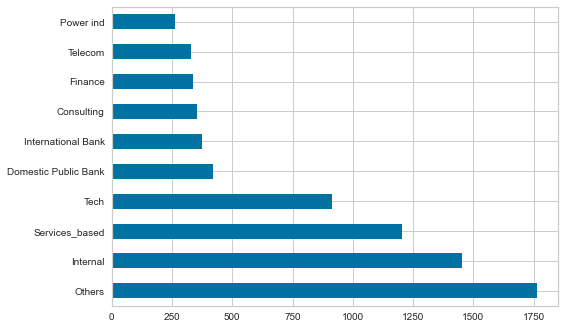

In [13]:
# Top 5 most frequently occuring 'client_category'
plt.pie(client_category[:5], labels=client_category_index[:5], autopct = '%1.2f%%')
plt.show()

# Top 10 most frequently occuring 'client_category'
client_category[:10].plot(kind='barh')
plt.show()

# Solution Type

In [14]:
# Count of each category in column 'Solution Type'
Sol_Type_category = newdata['Solution Type'].value_counts()
Sol_Type_category

Solution 32    1439
Solution 9     1418
Solution 10    1016
Solution 39     585
Solution 67     584
               ... 
Solution 60       1
Solution 57       1
Solution 56       1
Solution 18       1
Solution 19       1
Name: Solution Type, Length: 67, dtype: int64

In [15]:
# Unique categories in the column 'Solution Type'
Sol_Type_index = newdata['Solution Type'].value_counts().index
Sol_Type_index

Index(['Solution 32', 'Solution 9', 'Solution 10', 'Solution 39',
       'Solution 67', 'Solution 37', 'Solution 59', 'Solution 12',
       'Solution 8', 'Solution 29', 'Solution 6', 'Solution 13', 'Solution 31',
       'Solution 4', 'Solution 28', 'Solution 38', 'Solution 7', 'Solution 11',
       'Solution 20', 'Solution 52', 'Solution 40', 'Solution 30',
       'Solution 14', 'Solution 36', 'Solution 58', 'Solution 47',
       'Solution 35', 'Solution 55', 'Solution 33', 'Solution 48',
       'Solution 16', 'Solution 26', 'Solution 49', 'Solution 2',
       'Solution 34', 'Solution 42', 'Solution 61', 'Solution 41',
       'Solution 65', 'Solution 44', 'Solution 17', 'Solution 15',
       'Solution 50', 'Solution 25', 'Solution 1', 'Solution 43',
       'Solution 24', 'Solution 62', 'Solution 5', 'Solution 27',
       'Solution 46', 'Solution 3', 'Solution 22', 'Solution 53',
       'Solution 51', 'Solution 45', 'Solution 63', 'Solution 23',
       'Solution 54', 'Solution 21', 'Sol

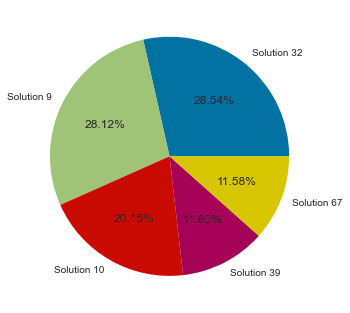

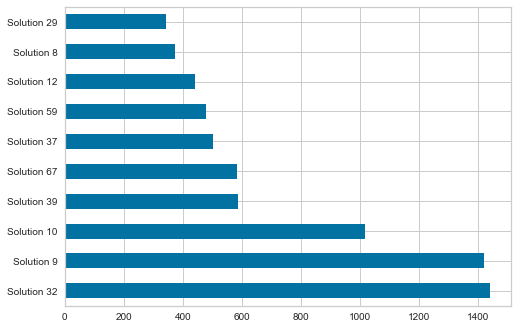

In [16]:
# Top 5 most frequently occuring 'Solution Type'
plt.pie(Sol_Type_category[:5], labels=Sol_Type_index[:5], autopct = '%1.2f%%')
plt.show()

# Top 10 most frequently occuring 'Solution Type'
Sol_Type_category[:10].plot(kind='barh')
plt.show()

# VP Name

In [17]:
# Count of each category in column 'VP Name'
VP_Name_category = newdata['VP Name'].value_counts()
VP_Name_category

Mervin Harwood         1166
Ankita Aggarwal        1143
Sargar Deep Rao         956
Long Bergstrom          921
Mangesh K. Singh        812
Rosanna Maynez          662
Ekta Zutshi             550
Rahul Bajpai            523
neeraj kumar            471
Son Mcconnaughy         232
som dutt                220
Hardeep Suksma          208
Brendon Wycoff          189
Clinton Mani            184
Saurabh Singh           176
Jewell Tunstall         156
Rudraksh Sharma         147
Gopa Trilochana         136
Russell Dahlen          133
Molly Eakes             126
Alam Syed               126
Gaurav Sameria          114
Varsha Arora            104
Gayle Molter            104
Vidur Hukle             100
Earline Langton          82
Manpreet Singh           46
Mayank Mewar             41
Marcella Mo              32
Rahul Kocher             32
Man Suddeth              29
Jitendra Choudhary       28
Prashant Rawat           27
Lilli Storrs             26
Vikram Rawat             17
Kamelesh Srinivasan 

In [18]:
# Unique categories in the column 'VP Name'
VP_Name_index = newdata['VP Name'].value_counts().index
VP_Name_index

Index(['Mervin Harwood', 'Ankita Aggarwal', 'Sargar Deep Rao',
       'Long Bergstrom', 'Mangesh K. Singh', 'Rosanna Maynez', 'Ekta Zutshi',
       'Rahul Bajpai', 'neeraj kumar', 'Son Mcconnaughy', 'som dutt',
       'Hardeep Suksma', 'Brendon Wycoff', 'Clinton Mani', 'Saurabh Singh',
       'Jewell Tunstall', 'Rudraksh Sharma', 'Gopa Trilochana',
       'Russell Dahlen', 'Molly Eakes', 'Alam Syed', 'Gaurav Sameria',
       'Varsha Arora', 'Gayle Molter', 'Vidur Hukle', 'Earline Langton',
       'Manpreet Singh', 'Mayank Mewar', 'Marcella Mo', 'Rahul Kocher',
       'Man Suddeth', 'Jitendra Choudhary', 'Prashant Rawat', 'Lilli Storrs',
       'Vikram Rawat', 'Kamelesh Srinivasan', 'Dennis Faux', 'Visvajeet Das',
       'Waylon Mulder', 'P. Somya', 'Kirk Hofmeister', 'Sarthak Batra',
       'md. afsar'],
      dtype='object')

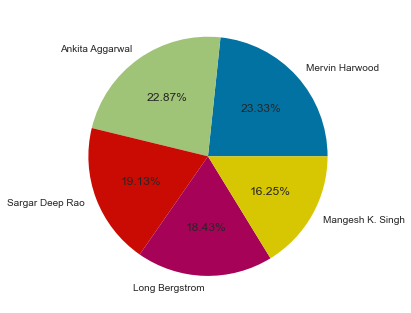

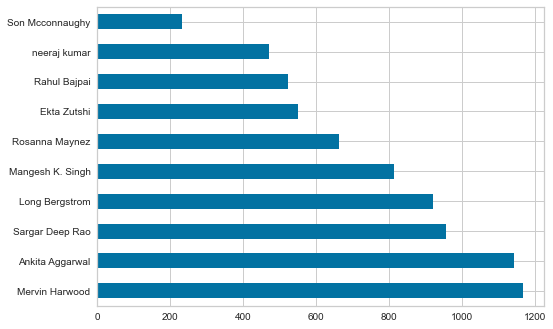

In [19]:
# Top 5 most frequently occuring 'VP Name'
plt.pie(VP_Name_category[:5], labels=VP_Name_index[:5], autopct = '%1.2f%%')
plt.show()

# Top 10 most frequently occuring 'VP Name'
VP_Name_category[:10].plot(kind='barh')
plt.show()

# Manager Name

In [20]:
# Count of each category in column 'Manager Name'
Manager_Name_category = newdata['Manager Name'].value_counts()
Manager_Name_category

Molly Eakes        323
Rudraksh Sharma    270
Desmond Krout      230
Gayle Molter       186
Manpreet Singh     181
                  ... 
Anju Nanda           1
Taran Singh          1
pooran chand         1
Rishab Bhatt         1
Cleotilde Biron      1
Name: Manager Name, Length: 278, dtype: int64

In [21]:
# Unique categories in the column 'Manager Name'
Manager_Name_index = newdata['Manager Name'].value_counts().index
Manager_Name_index

Index(['Molly Eakes', 'Rudraksh Sharma', 'Desmond Krout', 'Gayle Molter',
       'Manpreet Singh', 'Rosana Yokum', 'Rayford Durgan', 'Manish Saundriyal',
       'Jewell Tunstall', 'Hardeep Suksma',
       ...
       'Palmer Holmberg', 'Heath Mullarkey', 'Sultan Khan', 'Aastha Gandhi',
       'Anish Jonson', 'Anju Nanda', 'Taran Singh', 'pooran chand',
       'Rishab Bhatt', 'Cleotilde Biron'],
      dtype='object', length=278)

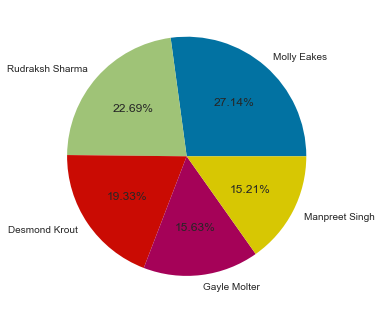

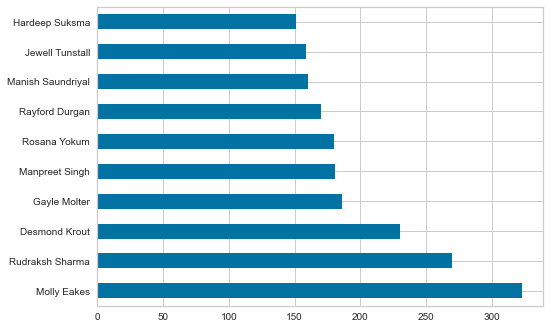

In [22]:
# Top 5 most frequently occuring 'Manager Name'
plt.pie(Manager_Name_category[:5], labels=Manager_Name_index[:5], autopct = '%1.2f%%')
plt.show()

# Top 10 most frequently occuring 'Manager Name'
Manager_Name_category[:10].plot(kind='barh')
plt.show()

# Check the relationship between independent variables vs dependent variable

In [23]:
newdata.head(3)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost


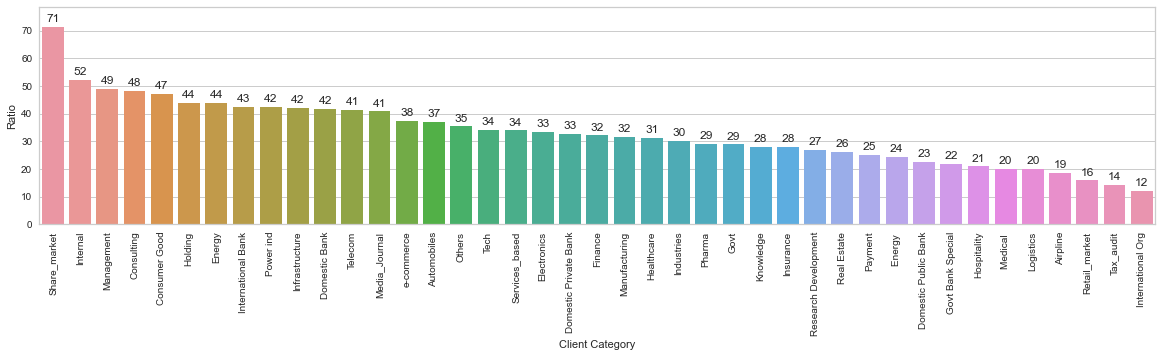

In [24]:
# Client Category vs Deal Status Code:
Client_cat = newdata[['Client Category', 
                          'Deal Status Code']].groupby(['Client Category', 
                                                        'Deal Status Code']).size().reset_index().rename(columns={0:
                                                                                                                  'Total Count'})
Client = Client_cat.groupby(['Client Category']).sum().reset_index()

Client_cat = pd.merge(Client_cat, Client, on ='Client Category', how ='right')
Client_cat = Client_cat[Client_cat['Deal Status Code']=='Won']
Client_cat['Ratio'] = (Client_cat['Total Count_x']/Client_cat['Total Count_y'])*100
Client_cat = Client_cat.sort_values(by=['Ratio'], ascending=False)
Client_cat = Client_cat[['Client Category', 'Ratio']]
fig, ax = plt.subplots(figsize=(20,4))
sns.barplot(ax=ax, x="Client Category", y="Ratio", data=Client_cat.head(50))
plt.xticks(rotation=90)
ax.margins(y=0.1) # make room for the labels
ax.bar_label(ax.containers[0], padding=3, rotation=0, fmt='%.0f')
plt.show()

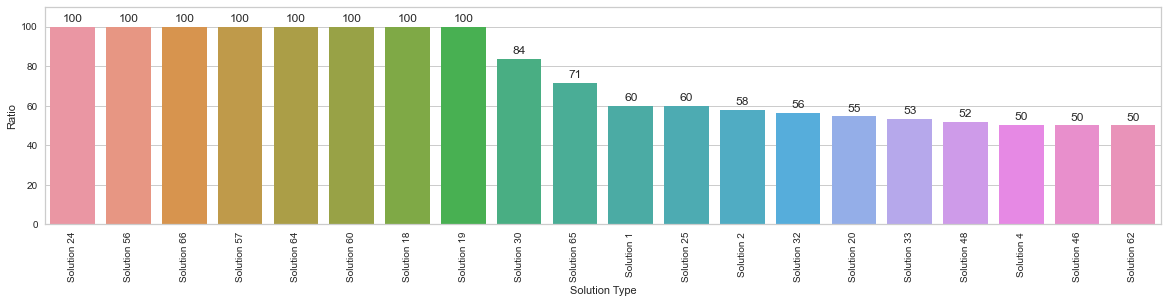

In [25]:
# Solution Type vs Deal Status Code:
Sol_Type_cat = newdata[['Solution Type', 
                          'Deal Status Code']].groupby(['Solution Type', 
                                                        'Deal Status Code']).size().reset_index().rename(columns={0:
                                                                                                                  'Total Count'})
Sol_Type = Sol_Type_cat.groupby(['Solution Type']).sum().reset_index()

Sol_Type_cat = pd.merge(Sol_Type_cat, Sol_Type, on ='Solution Type', how ='right')
Sol_Type_cat = Sol_Type_cat[Sol_Type_cat['Deal Status Code']=='Won']
Sol_Type_cat['Ratio'] = (Sol_Type_cat['Total Count_x']/Sol_Type_cat['Total Count_y'])*100
Sol_Type_cat = Sol_Type_cat.sort_values(by=['Ratio'], ascending=False)
Sol_Type_cat = Sol_Type_cat[['Solution Type', 'Ratio']]
fig, ax = plt.subplots(figsize=(20,4))
sns.barplot(ax=ax, x="Solution Type", y="Ratio", data=Sol_Type_cat.head(20))
plt.xticks(rotation=90)
ax.margins(y=0.1) # make room for the labels
ax.bar_label(ax.containers[0], padding=3, rotation=0, fmt='%.0f')
plt.show()

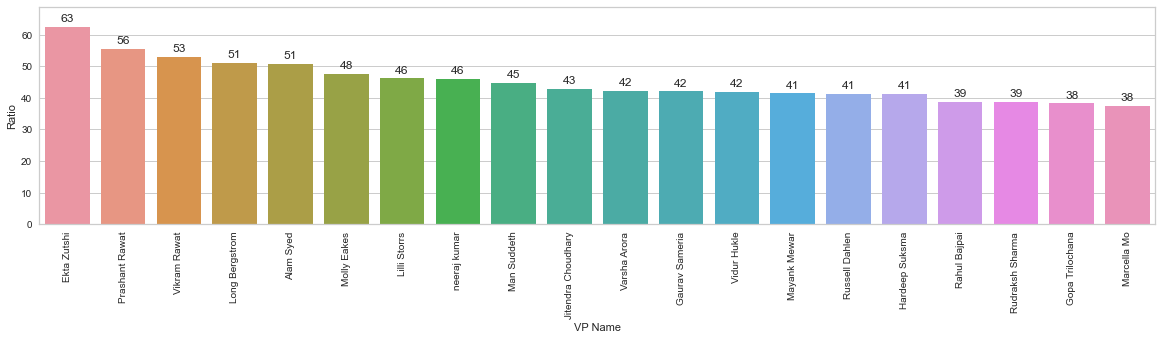

In [26]:
# VP Name vs Deal Status Code:
VP_Name_cat = newdata[['VP Name', 
                          'Deal Status Code']].groupby(['VP Name', 
                                                        'Deal Status Code']).size().reset_index().rename(columns={0:
                                                                                                                  'Total Count'})
VP_Name = VP_Name_cat.groupby(['VP Name']).sum().reset_index()

VP_Name_cat = pd.merge(VP_Name_cat, VP_Name, on ='VP Name', how ='right')
VP_Name_cat = VP_Name_cat[VP_Name_cat['Deal Status Code']=='Won']
VP_Name_cat['Ratio'] = (VP_Name_cat['Total Count_x']/VP_Name_cat['Total Count_y'])*100
VP_Name_cat = VP_Name_cat.sort_values(by=['Ratio'], ascending=False)
VP_Name_cat = VP_Name_cat[['VP Name', 'Ratio']]
fig, ax = plt.subplots(figsize=(20,4))
sns.barplot(ax=ax, x="VP Name", y="Ratio", data=VP_Name_cat.head(20))
plt.xticks(rotation=90)
ax.margins(y=0.1) # make room for the labels
ax.bar_label(ax.containers[0], padding=3, rotation=0, fmt='%.0f')
plt.show()

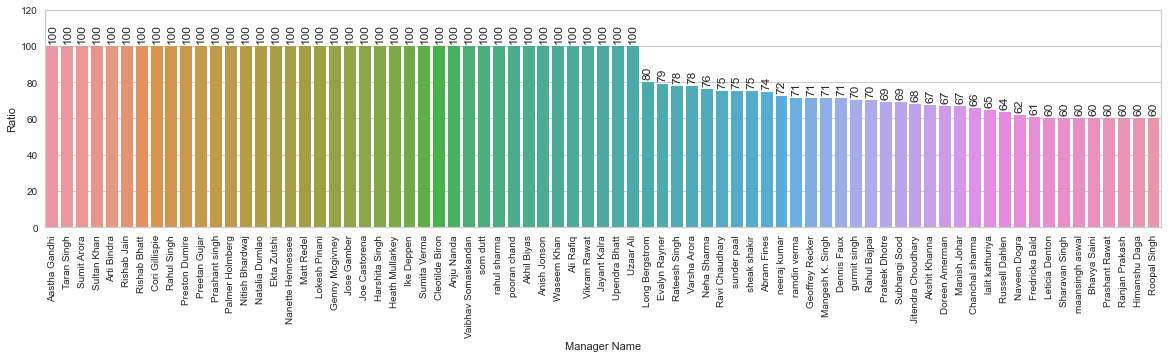

In [27]:
# Manager Name vs Deal Status Code:
Manager_Name_cat = newdata[['Manager Name', 
                          'Deal Status Code']].groupby(['Manager Name', 
                                                        'Deal Status Code']).size().reset_index().rename(columns={0:
                                                                                                                  'Total Count'})
Manager_Name = Manager_Name_cat.groupby(['Manager Name']).sum().reset_index()

Manager_Name_cat = pd.merge(Manager_Name_cat, Manager_Name, on ='Manager Name', how ='right')
Manager_Name_cat = Manager_Name_cat[Manager_Name_cat['Deal Status Code']=='Won']
Manager_Name_cat['Ratio'] = (Manager_Name_cat['Total Count_x']/Manager_Name_cat['Total Count_y'])*100
Manager_Name_cat = Manager_Name_cat.sort_values(by=['Ratio'], ascending=False)
Manager_Name_cat = Manager_Name_cat[['Manager Name', 'Ratio']]
fig, ax = plt.subplots(figsize=(20,4))
sns.barplot(ax=ax, x="Manager Name", y="Ratio", data=Manager_Name_cat.head(75))
plt.xticks(rotation=90)
ax.margins(y=0.2) # make room for the labels
ax.bar_label(ax.containers[0], padding=3, rotation=90, fmt='%.0f')

plt.show()

In [28]:
newdata.head(3)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost


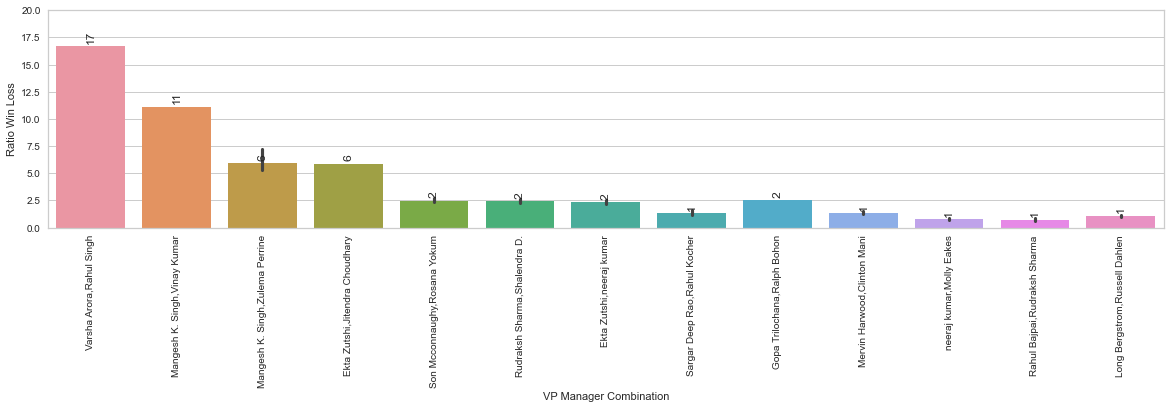

In [29]:
# VP Manager Combination vs Deal Status Code for Deal Cost > 50000000:
newdata['VP Manager Combination'] = newdata['VP Name'] + ',' + newdata['Manager Name']

VP_Manager_Name_cat = newdata[['VP Manager Combination',
                               'Deal Cost',
                               'Deal Status Code']].groupby(['VP Manager Combination', 'Deal Cost',
                                                        'Deal Status Code']).size().reset_index().rename(columns={0:
                                                                                                                  'Total Count'})
VP_Manager_Name = VP_Manager_Name_cat.groupby(['VP Manager Combination']).sum().reset_index()

VP_Manager_Name_cat = pd.merge(VP_Manager_Name_cat, VP_Manager_Name, on ='VP Manager Combination', how ='inner')
VP_Manager_Name_cat = VP_Manager_Name_cat[VP_Manager_Name_cat['Deal Status Code']=='Won']
VP_Manager_Name_cat = VP_Manager_Name_cat[VP_Manager_Name_cat['Deal Cost_y']>50000000]
VP_Manager_Name_cat['Ratio Win Loss'] = (VP_Manager_Name_cat['Total Count_x']/VP_Manager_Name_cat['Total Count_y'])*100
VP_Manager_Name_cat
VP_Manager_Name_cat = VP_Manager_Name_cat.sort_values(by=['Ratio Win Loss'], ascending=False)
VP_Manager_Name_cat = VP_Manager_Name_cat[['VP Manager Combination', 'Ratio Win Loss', 'Deal Cost_y']]

fig, ax = plt.subplots(figsize=(20,4))
sns.barplot(ax=ax, x="VP Manager Combination", y="Ratio Win Loss", data=VP_Manager_Name_cat)
plt.xticks(rotation=90)
ax.margins(y=0.2) # make room for the labels
ax.bar_label(ax.containers[0], padding=3, rotation=90, fmt='%.0f')

plt.show()

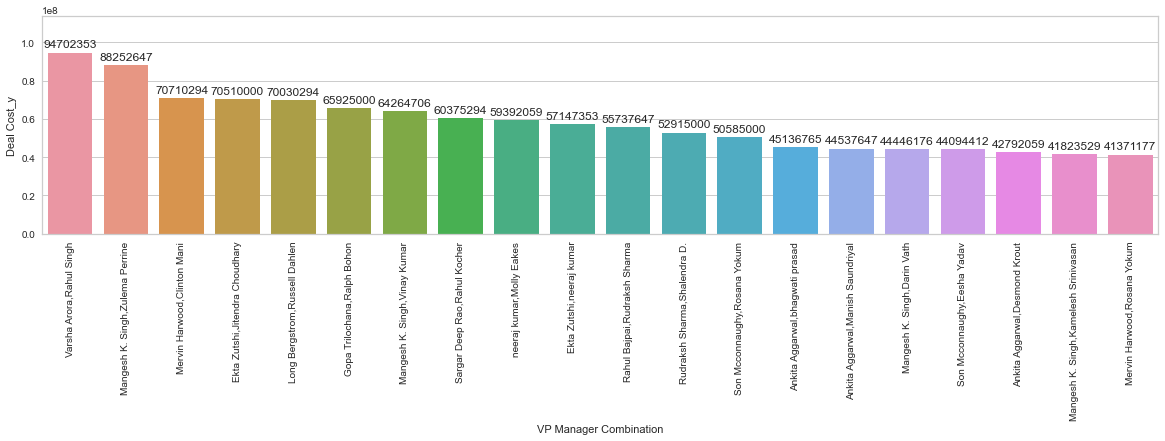

In [30]:
# VP Manager Combination vs Deal Cost:
newdata['VP Manager Combination'] = newdata['VP Name'] + ',' + newdata['Manager Name']

VP_Manager_Name_cat = newdata[['VP Manager Combination',
                               'Deal Cost',
                               'Deal Status Code']].groupby(['VP Manager Combination', 'Deal Cost',
                                                        'Deal Status Code']).size().reset_index().rename(columns={0:
                                                                                                                  'Total Count'})
VP_Manager_Name = VP_Manager_Name_cat.groupby(['VP Manager Combination']).sum().reset_index()

VP_Manager_Name_cat = pd.merge(VP_Manager_Name_cat, VP_Manager_Name, on ='VP Manager Combination', how ='inner')
VP_Manager_Name_cat = VP_Manager_Name_cat[VP_Manager_Name_cat['Deal Status Code']=='Won']
VP_Manager_Name_cat['Ratio Win Loss'] = (VP_Manager_Name_cat['Total Count_x']/VP_Manager_Name_cat['Total Count_y'])*100
VP_Manager_Name_cat = VP_Manager_Name_cat.sort_values(by=['Deal Cost_y'], ascending=False)
VP_Manager_Name_cat = VP_Manager_Name_cat[['VP Manager Combination', 'Ratio Win Loss', 'Deal Cost_y']]
fig, ax = plt.subplots(figsize=(20,4))
sns.barplot(ax=ax, x="VP Manager Combination", y="Deal Cost_y", data=VP_Manager_Name_cat.head(500))
plt.xticks(rotation=90)
ax.margins(y=0.2) # make room for the labels
ax.bar_label(ax.containers[0], padding=3, rotation=0, fmt='%.0f')

plt.show()

In [31]:
pd.pivot_table(newdata, index='Deal Status Code', columns='Manager Name', values='Deal Cost').reset_index()

Manager Name,Deal Status Code,Aastha Gandhi,Abhinav Warrier,Abhishek Singhal,Abhiskek Kumar,Abhiskhek D,Abram Fines,Aditya Kumar,Aditya Tondon,Ahdarsha Jha,...,shafibul,sharat chandran,sheak shakir,shiv kumar,shiv shakti singh,shyam kumar,som dutt,sunder paal,vansu dev,vinit katariya
0,Lost,NaN,588808.824000,772860.963182,949894.957857,440767.973889,501764.706000,792647.06,1058823.53,924866.311818,...,2.867647e+06,441176.470,882352.940000,219019.61,1470588.24,715250.000000,NaN,882352.940,9.687406e+05,1.098739e+06
1,Won,242647.06,302235.296667,476956.522609,587507.740789,375658.823600,714127.789655,250367.65,NaN,351102.940000,...,NaN,989411.765,461127.451667,NaN,NaN,307769.608333,198627.45,371960.785,1.253295e+06,3.917206e+06


In [32]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Client Category         10061 non-null  object        
 1   Solution Type           10061 non-null  object        
 2   Deal Date               10061 non-null  datetime64[ns]
 3   Sector                  10061 non-null  object        
 4   Location                10061 non-null  object        
 5   VP Name                 10061 non-null  object        
 6   Manager Name            10061 non-null  object        
 7   Deal Cost               10061 non-null  float64       
 8   Deal Status Code        10061 non-null  object        
 9   VP Manager Combination  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 786.1+ KB


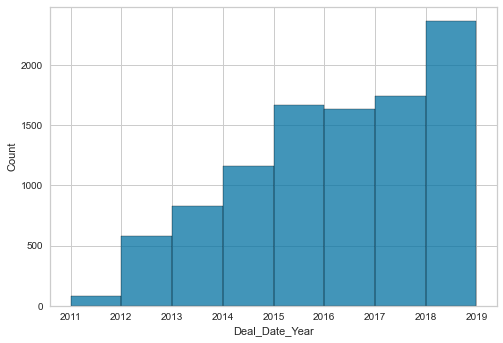

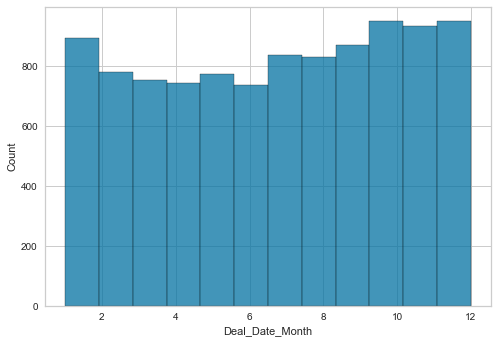

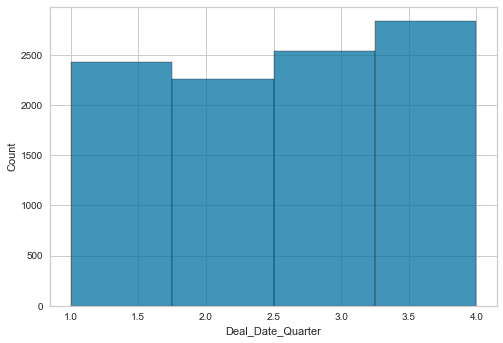

In [33]:
# Year wise Revenue
import datetime
newdata['Deal_Date_Year'] = newdata['Deal Date'].dt.year
newdata['Deal_Date_Month'] = newdata['Deal Date'].dt.month
newdata['Deal_Date_Quarter'] = newdata['Deal Date'].dt.quarter
sns.histplot(newdata['Deal_Date_Year'], bins=8)
plt.show()
sns.histplot(newdata['Deal_Date_Month'], bins=12)
plt.show()
sns.histplot(newdata['Deal_Date_Quarter'], bins=4)
plt.show()

<AxesSubplot:>

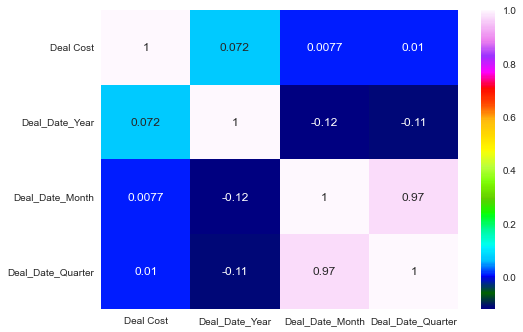

In [34]:
# Correlation Check
sns.heatmap(newdata.corr(), annot=True, cmap='gist_ncar')

# Encode Categorical Variables

In [35]:
newdata['Client Category'].value_counts()

Others                   1842
Internal                 1454
Services_based           1202
Tech                      913
Domestic Public Bank      419
International Bank        376
Consulting                352
Finance                   339
Telecom                   327
Power ind                 264
Domestic Private Bank     262
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            152
Domestic Bank             134
Retail_market             126
Govt                      121
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce                 32
Airpline  

In [36]:
newdata = newdata.drop(['Deal Date', 'VP Manager Combination', 'Deal_Date_Year', 'Deal_Date_Month', 'Deal_Date_Quarter'], axis=1)

In [37]:
# Manually encoding each column.
# The same can be done using LabelEncoder as well

newdata['Client Category'] = newdata['Client Category'].astype('category')
newdata['Client Category'] = newdata['Client Category'].cat.codes

newdata['Solution Type'] = newdata['Solution Type'].astype('category')
newdata['Solution Type'] = newdata['Solution Type'].cat.codes

newdata['Sector'] = newdata['Sector'].astype('category')
newdata['Sector'] = newdata['Sector'].cat.codes

newdata['Location'] = newdata['Location'].astype('category')
newdata['Location'] = newdata['Location'].cat.codes

newdata['VP Name'] = newdata['VP Name'].astype('category')
newdata['VP Name'] = newdata['VP Name'].cat.codes

newdata['Manager Name'] = newdata['Manager Name'].astype('category')
newdata['Manager Name'] = newdata['Manager Name'].cat.codes

newdata['Deal Status Code'] = newdata['Deal Status Code'].astype('category')
newdata['Deal Status Code'] = newdata['Deal Status Code'].cat.codes

In [38]:
newdata.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,39,64,16,7,6,82,150000.00,1
1,39,64,16,7,6,82,744705.88,1
2,19,54,12,12,6,183,60000.00,0
3,19,54,12,12,6,183,60000.00,0
4,19,25,12,12,6,183,80882.35,0


# Split the data into X and Y

In [39]:
x = newdata.iloc[:, 0:-1].values
y = newdata['Deal Status Code'].values

# Feature Scaling 

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1 = sc.fit_transform(x)
x1

array([[ 1.40299487,  1.29765094,  0.78535088, ..., -1.11119992,
        -0.71544412, -0.38084443],
       [ 1.40299487,  1.29765094,  0.78535088, ..., -1.11119992,
        -0.71544412, -0.01369972],
       [-0.33339304,  0.86106354,  0.01663725, ..., -1.11119992,
         0.60004268, -0.43640639],
       ...,
       [ 0.70843971,  1.38496843,  2.32277814, ...,  0.79154462,
         0.58701806, -0.11029764],
       [ 0.70843971,  1.0356985 ,  2.32277814, ..., -0.03573561,
        -1.13223202,  1.40458284],
       [ 0.44798152,  1.38496843, -1.71296842, ...,  1.20518474,
         1.0298552 , -0.38266018]])

# Train Test Split

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y, train_size=0.7, random_state=101)

# +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

# Model Building

# +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

# 1) Random Forest Classifier

In [42]:
# Model Initialization
fit_rf = RandomForestClassifier()
fit_rf.fit(x_train, y_train)

RandomForestClassifier()

In [43]:
# # Hyperparameter Optimization using GridSearchCV
# # Execute this code snippet only to find the optimal values of parameters. Comment it out afterwards
# # Automatically find the best parameters instead of manual hit and try

# np.random.seed(42)
# start = time.time()

# param_dist = {'max_depth': [8,10,12,14,16,18,20],
#               'bootstrap': [True, False],
#               'max_features': ['auto', None],
#               'criterion': ['gini', 'entropy'],
#               'min_samples_split' : [3, 6, 8, 10, 12],
#               'min_samples_leaf' : [2, 3, 4, 6, 8]}

# # Here we can add 'n_estimator' : [400, 500, 600...], 'min_samples_split' : [5, 10, 15, 20, 30], 
# # 'min_samples_leaf' : [2, 3, 4, 5, 7] but that will consume lot of resources and increase computational time
# # Hence calculate OOB Error Rate and manually put the n_estimator value later

# cv_rf = GridSearchCV(fit_rf, cv = 10,
#                      param_grid=param_dist, 
#                      n_jobs = -1)                 # n_jobs should be 1 less than number of CPU cores. -1 means all cores

# cv_rf.fit(x_train, y_train)
# print('Best Parameters using grid search: \n', cv_rf.best_params_)
# end = time.time()
# print('Time taken in grid search: {0: .2f}'.format(end - start))

In [44]:
# Set best parameters given by grid search 
fit_rf.set_params(max_depth=20, 
                  criterion="gini", 
                  min_samples_split=3, 
                  min_samples_leaf=2,
                  bootstrap=False,
                  max_features = 'auto')

RandomForestClassifier(bootstrap=False, max_depth=20, max_features='auto',
                       min_samples_leaf=2, min_samples_split=3)

In [45]:
# # OOB (Out of Bag) Error Rate

# fit_rf.set_params(warm_start=True, oob_score=True)
 
# min_estimators = 100
# max_estimators = 500

# error_rate = {}

# for i in range(min_estimators, max_estimators + 1):
#     fit_rf.set_params(n_estimators=i)
#     fit_rf.fit(x_train, y_train)

#     oob_error = 1 - fit_rf.oob_score_
#     error_rate[i] = oob_error
    
# # Convert dictionary to a pandas series for easy plotting 
# oob_series = pd.Series(error_rate)

# fig, ax = plt.subplots(figsize=(10, 10))

# ax.set_facecolor('#fafafa')

# oob_series.plot(kind='line',color = 'red')
# plt.xlabel('n_estimators')
# plt.ylabel('OOB Error Rate')
# plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1500 trees)')

In [46]:
# print('OOB Error rate for 650 trees is: {0:.5f}'.format(oob_series[112]))

In [47]:
# # Refine the tree via OOB Output for n_estimators
# # n_estimators is the number of trees we want to build before taking the maximum voting or averages of predictions

# fit_rf.set_params(n_estimators=112,
#                   bootstrap = True,
#                   warm_start=False, 
#                   oob_score=False)

In [48]:
# Predictions
y_pred_rf_train = fit_rf.predict(x_train)
y_pred_rf_test = fit_rf.predict(x_test)

In [49]:
# Training & Testing Score
print(accuracy_score(y_train, y_pred_rf_train))
print(accuracy_score(y_test, y_pred_rf_test))

0.9967338824197671
0.819807883405101


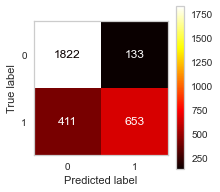

In [50]:
# Confusion Matrix
# print(confusion_matrix(y_test, y_pred_rf_test)) 
fig, ax = plt.subplots(figsize=(3,3))
plot_confusion_matrix(fit_rf, x_test, y_test, cmap='hot', normalize=None, ax=ax)
plt.grid(False)

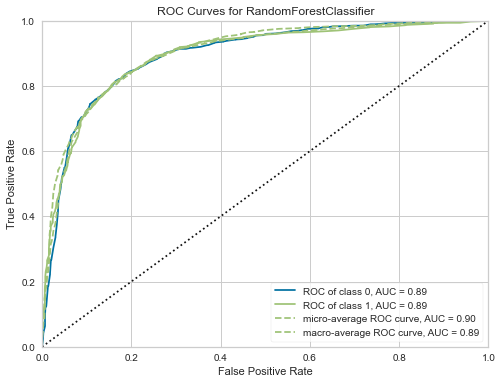

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [51]:
# Area Under Curve
fig, ax = plt.subplots(figsize=(8, 6))
visualizer = ROCAUC(fit_rf, ax)
visualizer.fit(x_train, y_train)                 # Fit the training data to the visualizer
auc_dt = visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()                                # Finalize and render the figure

In [52]:
print(classification_report(y_test, y_pred_rf_test))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1955
           1       0.83      0.61      0.71      1064

    accuracy                           0.82      3019
   macro avg       0.82      0.77      0.79      3019
weighted avg       0.82      0.82      0.81      3019



# +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

# 2) XG Boost Classifier

In [53]:
# # Hyperparameter Optimization using GridSearchCV
# # Execute this code snippet only to find the optimal values of parameters. Comment it out afterwards
# # Automatically find the best parameters instead of manual hit and try

# param = {'max_depth':range(3,10,2),
#          'min_child_weight':range(1,6,2),
#          'gamma':[i/10.0 for i in range(0,5)],
#          'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]}

# gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.1, n_estimators = 140, min_child_weight = 1, 
#                                                   subsample = 0.8, colsample_bytree = 0.8,
#                                                   objective= 'binary:logistic', nthread = -1, scale_pos_weight = 1, seed = 27), 
#                                                   param_grid = param, scoring = 'recall', n_jobs=-1, cv = 5)

# gsearch1.fit(x_train, y_train)
# print('Best Parameters using grid search: \n', gsearch1.best_params_)

In [54]:
# Model Initialization with Tuned Hyperparameters
fit_xgb = XGBClassifier(gamma = 0.1, max_depth = 9, min_child_weight = 1, reg_alpha = 0)
fit_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [55]:
# Predictions
y_pred_xgb_train = fit_xgb.predict(x_train)
y_pred_xgb_test = fit_xgb.predict(x_test)

In [56]:
# Training & Testing Score
print(accuracy_score(y_train, y_pred_xgb_train))
print(accuracy_score(y_test, y_pred_xgb_test))

0.989065606361829
0.817820470354422


In [57]:
# Performance Metrics
accuracy_xgb = metrics.accuracy_score(y_test, y_pred_xgb_test)
Precision_xgb = metrics.precision_score(y_test, y_pred_xgb_test)
recall_xgb = metrics.recall_score(y_test, y_pred_xgb_test)

print("Accuracy:",accuracy_xgb)
print("Precision (Weighted Average):",Precision_xgb)
print("Recall (Weighted Average):",recall_xgb)

Accuracy: 0.817820470354422
Precision (Weighted Average): 0.8002336448598131
Recall (Weighted Average): 0.643796992481203


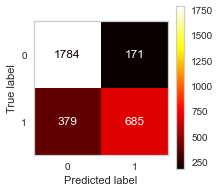

In [58]:
# Confusion Matrix
# print(confusion_matrix(y_test, y_pred_xgb_test)) 
fig, ax = plt.subplots(figsize=(3,3))
plot_confusion_matrix(fit_xgb, x_test, y_test, cmap='hot', normalize=None, ax=ax)
plt.grid(False)

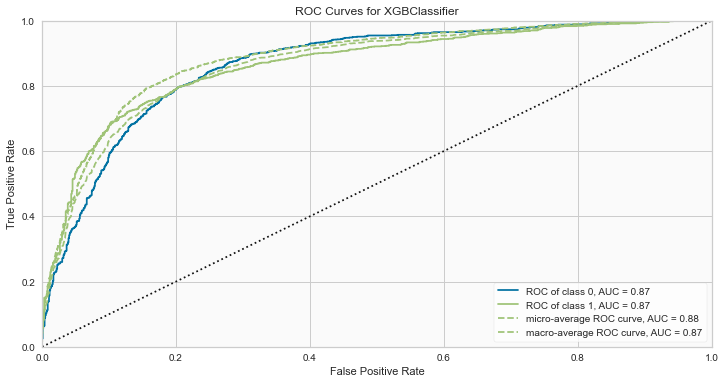

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [59]:
# Area Under Curve
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor('#fafafa')

visualizer = ROCAUC(fit_xgb, ax)

visualizer.fit(x_train, y_train)                 # Fit the training data to the visualizer
auc_dt = visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()                                # Finalize and render the figure

In [60]:
print(classification_report(y_test, y_pred_xgb_test))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1955
           1       0.80      0.64      0.71      1064

    accuracy                           0.82      3019
   macro avg       0.81      0.78      0.79      3019
weighted avg       0.82      0.82      0.81      3019



# +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

# 3) Stacking Classifier

In [61]:
from mlxtend.classifier import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

10-Fold Cross Validation :

KNN
------------------------------------------------
Accuracy  : 0.62 (+/- 0.02)
Precision : 0.50 (+/- 0.03)
Recall    : 0.43 (+/- 0.03)
F1 Score  : 0.46 (+/- 0.03)
------------------------------------------------

Naive Bayes
------------------------------------------------
Accuracy  : 0.63 (+/- 0.01)
Precision : 0.50 (+/- 0.15)
Recall    : 0.03 (+/- 0.01)
F1 Score  : 0.06 (+/- 0.02)
------------------------------------------------

Logistic Regression
------------------------------------------------
Accuracy  : 0.63 (+/- 0.00)
Precision : 0.00 (+/- 0.00)
Recall    : 0.00 (+/- 0.00)
F1 Score  : 0.00 (+/- 0.00)
------------------------------------------------

Decision Tree
------------------------------------------------
Accuracy  : 0.60 (+/- 0.02)
Precision : 0.47 (+/- 0.02)
Recall    : 0.67 (+/- 0.04)
F1 Score  : 0.55 (+/- 0.02)
------------------------------------------------

Stacking Classifier
------------------------------------------------
Accuracy 

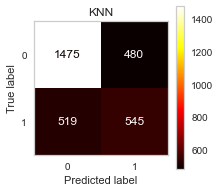

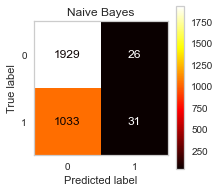

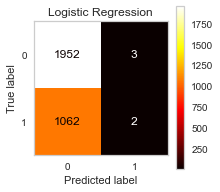

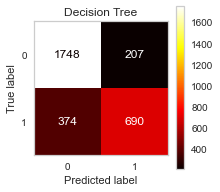

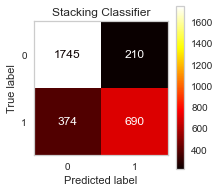

In [62]:
# Initialize the models to be used in Stacking Classifier:
clf1 = KNeighborsClassifier(n_neighbors = 3)
clf2 = GaussianNB()
clf3 = RandomForestClassifier(max_depth=20,criterion="gini",min_samples_split=3,min_samples_leaf=2,bootstrap=False,
                              max_features = 'auto',random_state = 101)
clf4 = LogisticRegression(random_state = 101)
clf5 = DecisionTreeClassifier(random_state = 101)


sclf = StackingClassifier(classifiers = [clf1, clf2, clf3, clf4, clf5], 
                          meta_classifier = clf3,
                          use_probas = True, 
                          use_features_in_secondary = True)

print('10-Fold Cross Validation :\n')

for clf, label in zip([clf1, clf2, clf4, clf5, sclf], ['KNN', 'Naive Bayes', 'Logistic Regression', 
                                                       'Decision Tree', 'Stacking Classifier']):
    
    print(label)
    print('------------------------------------------------')
    
    scores_accuracy = cross_val_score(clf, x, y, cv = 10, scoring = 'accuracy', n_jobs = -1)
    print("Accuracy  : %0.2f (+/- %0.2f)" %(scores_accuracy.mean(), scores_accuracy.std()))
    
    scores_precision = cross_val_score(clf, x, y, cv = 10, scoring = 'precision', n_jobs = -1)
    print("Precision : %0.2f (+/- %0.2f)" %(scores_precision.mean(), scores_precision.std()))
    
    scores_recall = cross_val_score(clf, x, y, cv = 10, scoring = 'recall', n_jobs = -1)
    print("Recall    : %0.2f (+/- %0.2f)" %(scores_recall.mean(), scores_recall.std()))
    
    scores_f1 = cross_val_score(clf, x, y, cv = 10, scoring = 'f1', n_jobs = -1)
    print("F1 Score  : %0.2f (+/- %0.2f)" %(scores_f1.mean(), scores_f1.std()))
    
    fig, ax = plt.subplots(figsize=(3,3))
    plot_confusion_matrix(clf.fit(x_train, y_train), x_test, y_test, cmap='hot', normalize=None, ax=ax)
    ax.set_title(label)
    plt.grid(False)
    
    print('------------------------------------------------', end = '\n\n')

# +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

# 4) Deep Neural Network

In [63]:
# Model Initialization

In [64]:
fit_dnn = tf.keras.models.Sequential()
fit_dnn.add(tf.keras.layers.Dense(units=50,activation='relu'))
fit_dnn.add(tf.keras.layers.Dense(units=50,activation='relu'))
fit_dnn.add(tf.keras.layers.Dense(units=50,activation='relu'))
fit_dnn.add(tf.keras.layers.Dense(units=50,activation='relu'))
fit_dnn.add(tf.keras.layers.Dense(units=50,activation='relu'))
fit_dnn.add(tf.keras.layers.Dense(units=50,activation='relu'))
fit_dnn.add(tf.keras.layers.Dense(units=50,activation='relu'))
fit_dnn.add(tf.keras.layers.Dense(units=50,activation='relu'))
fit_dnn.add(tf.keras.layers.Dense(units=50,activation='relu'))
fit_dnn.add(tf.keras.layers.Dense(units=50,activation='relu'))
fit_dnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
fit_dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
fit_dnn.fit(x_train, y_train, epochs=200)

Epoch 1/200
221/221 [==============================] - 1s 1ms/step - loss: 0.6610 - accuracy: 0.6176
Epoch 2/200
221/221 [==============================] - 0s 1ms/step - loss: 0.6524 - accuracy: 0.6145
Epoch 3/200
221/221 [==============================] - 0s 1ms/step - loss: 0.6430 - accuracy: 0.6319
Epoch 4/200
221/221 [==============================] - 0s 1ms/step - loss: 0.6387 - accuracy: 0.6434
Epoch 5/200
221/221 [==============================] - 0s 1ms/step - loss: 0.6371 - accuracy: 0.6431
Epoch 6/200
221/221 [==============================] - 0s 1ms/step - loss: 0.6305 - accuracy: 0.6598
Epoch 7/200
221/221 [==============================] - 0s 1ms/step - loss: 0.6244 - accuracy: 0.6559
Epoch 8/200
221/221 [==============================] - 0s 1ms/step - loss: 0.6204 - accuracy: 0.6666
Epoch 9/200
221/221 [==============================] - 0s 1ms/step - loss: 0.6149 - accuracy: 0.6671
Epoch 10/200
221/221 [==============================] - 0s 1ms/step - loss: 0.6091 - accura

221/221 [==============================] - 0s 1ms/step - loss: 0.3065 - accuracy: 0.8569
Epoch 82/200
221/221 [==============================] - 0s 1ms/step - loss: 0.3039 - accuracy: 0.8559
Epoch 83/200
221/221 [==============================] - 0s 1ms/step - loss: 0.3095 - accuracy: 0.8563
Epoch 84/200
221/221 [==============================] - 0s 1ms/step - loss: 0.3051 - accuracy: 0.8547
Epoch 85/200
221/221 [==============================] - 0s 1ms/step - loss: 0.3207 - accuracy: 0.8527
Epoch 86/200
221/221 [==============================] - 0s 1ms/step - loss: 0.3002 - accuracy: 0.8650
Epoch 87/200
221/221 [==============================] - 0s 1ms/step - loss: 0.2921 - accuracy: 0.8624
Epoch 88/200
221/221 [==============================] - 0s 1ms/step - loss: 0.2943 - accuracy: 0.8608
Epoch 89/200
221/221 [==============================] - 0s 1ms/step - loss: 0.3021 - accuracy: 0.8610
Epoch 90/200
221/221 [==============================] - 0s 1ms/step - loss: 0.2859 - accuracy: 

221/221 [==============================] - 0s 2ms/step - loss: 0.1999 - accuracy: 0.9083
Epoch 161/200
221/221 [==============================] - 0s 1ms/step - loss: 0.2009 - accuracy: 0.9083
Epoch 162/200
221/221 [==============================] - 0s 1ms/step - loss: 0.2007 - accuracy: 0.9077
Epoch 163/200
221/221 [==============================] - 0s 1ms/step - loss: 0.1943 - accuracy: 0.9134
Epoch 164/200
221/221 [==============================] - 0s 1ms/step - loss: 0.2116 - accuracy: 0.9053
Epoch 165/200
221/221 [==============================] - 0s 1ms/step - loss: 0.2032 - accuracy: 0.9090
Epoch 166/200
221/221 [==============================] - 0s 1ms/step - loss: 0.2042 - accuracy: 0.9083
Epoch 167/200
221/221 [==============================] - 0s 1ms/step - loss: 0.2095 - accuracy: 0.9068
Epoch 168/200
221/221 [==============================] - 0s 1ms/step - loss: 0.2017 - accuracy: 0.9081
Epoch 169/200
221/221 [==============================] - 0s 1ms/step - loss: 0.1994 - a

In [65]:
# Predictions
y_pred_dnn_test = fit_dnn.predict(x_test)
y_pred_dnn_test = (y_pred_dnn_test>0.5)

y_pred_dnn_train = fit_dnn.predict(x_train)
y_pred_dnn_train = (y_pred_dnn_train>0.5)

In [66]:
# Training & Testing Score
print(accuracy_score(y_train, y_pred_dnn_train))
print(accuracy_score(y_test, y_pred_dnn_test))

0.9308435103663731
0.7585293143424975


In [67]:
# Performance Metrics
accuracy_dnn = metrics.accuracy_score(y_test, y_pred_dnn_test)
Precision_dnn = metrics.precision_score(y_test, y_pred_dnn_test)
recall_dnn = metrics.recall_score(y_test, y_pred_dnn_test)

print("Accuracy:",accuracy_dnn)
print("Precision (Weighted Average):",Precision_dnn)
print("Recall (Weighted Average):",recall_dnn)

Accuracy: 0.7585293143424975
Precision (Weighted Average): 0.6799140708915145
Recall (Weighted Average): 0.5949248120300752


In [68]:
# Confusion Matrix
print(confusion_matrix(y_test, y_pred_dnn_test)) 

[[1657  298]
 [ 431  633]]


In [69]:
print(classification_report(y_test, y_pred_dnn_test))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1955
           1       0.68      0.59      0.63      1064

    accuracy                           0.76      3019
   macro avg       0.74      0.72      0.73      3019
weighted avg       0.75      0.76      0.75      3019



In [70]:
# Deep Neural Network gives the best performance metrics and hence is the most preferred model